In [1]:
# import required libraries

import pandas as pd

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matches = pd.read_csv("matches_bundesliga_v2.csv", index_col=0)

In [4]:
matches.shape

(3060, 30)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
table = matches.head()

In [7]:
matches["team"].value_counts()

Bayern Munich          170
Augsburg               170
RB Leipzig             170
Hertha BSC             170
Freiburg               170
Bayer Leverkusen       170
Eintracht Frankfurt    170
Wolfsburg              170
Mainz 05               170
Monchengladbach        170
Hoffenheim             170
Dortmund               170
Schalke 04             136
Stuttgart              136
Werder Bremen          136
Koln                   136
Union Berlin           136
Bochum                  68
Arminia                 68
Dusseldorf              68
Greuther Furth          34
Paderborn 07            34
Hannover 96             34
Nurnberg                34
Name: team, dtype: int64

In [8]:
matches.isna().sum()

date               0
time               0
comp               0
round              0
day                0
venue              0
result             0
gf                 0
ga                 0
opponent           0
xg                 2
xga                2
poss               0
attendance       744
captain            0
formation          0
referee            0
match report       0
notes           3058
sh                 0
sot                0
dist               3
fk                 2
pk                 0
pkatt              0
season             0
team               0
wwages            34
awages            34
age                0
dtype: int64

In [9]:
matches["round"].value_counts()

Matchweek 1     90
Matchweek 26    90
Matchweek 20    90
Matchweek 21    90
Matchweek 22    90
Matchweek 23    90
Matchweek 24    90
Matchweek 25    90
Matchweek 27    90
Matchweek 2     90
Matchweek 28    90
Matchweek 29    90
Matchweek 30    90
Matchweek 31    90
Matchweek 32    90
Matchweek 33    90
Matchweek 19    90
Matchweek 18    90
Matchweek 17    90
Matchweek 16    90
Matchweek 15    90
Matchweek 14    90
Matchweek 13    90
Matchweek 12    90
Matchweek 11    90
Matchweek 10    90
Matchweek 9     90
Matchweek 8     90
Matchweek 7     90
Matchweek 6     90
Matchweek 5     90
Matchweek 4     90
Matchweek 3     90
Matchweek 34    90
Name: round, dtype: int64

In [10]:
del matches["comp"]
del matches["notes"]

In [11]:
matches.loc[matches.attendance.isna()==True, 'attendance'] = round(matches.attendance.mean(), 0)

In [12]:
matches.loc[matches.dist.isna()==True, 'dist'] = round(matches.dist.mean(), 0)

In [13]:
matches.loc[matches.wwages.isna()==True, 'wwages'] = round(matches.wwages.mean(), 0)

In [14]:
matches.loc[matches.awages.isna()==True, 'awages'] = round(matches.awages.mean(), 0)

In [15]:
matches["target"] = (matches["result"] == "W").astype("int")

In [16]:
matches["date"] = pd.to_datetime(matches["date"])

In [17]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes

In [18]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

In [19]:
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

In [20]:
matches["day_code"] = matches["date"].dt.dayofweek

In [21]:
matches["captain_code"] = matches["captain"].astype("category").cat.codes
matches["referee_code"] = matches["referee"].astype("category").cat.codes

In [22]:
# matches["comp_code"] = matches["comp"].astype("category").cat.codes

In [23]:
# matches["round_code"] = matches["round"].astype("category").cat.codes

In [24]:
matches["formation_code"] = matches["formation"].astype("category").cat.codes

In [25]:
matches["age_int"] = (round(matches["age"], 0)).astype("int")

In [26]:
def categorize_wwages(wwages):
    if wwages > 1400000:
        return 1
    elif 500000 < wwages <= 1400000:
        return 2
    else:
        return 3

In [27]:
def categorize_awages(awages):
    if awages > 100000000:
        return 1
    elif 3500000 < awages <= 100000000:
        return 2
    else:
        return 3

In [28]:
matches['wwages_category'] = matches['wwages'].apply(categorize_wwages)

In [29]:
matches['awages_category'] = matches['awages'].apply(categorize_awages)

In [30]:
predictors = ["venue_code", "opp_code", "hour", "day_code", "captain_code", "referee_code", "formation_code", "age_int", "wwages_category", "awages_category"]

In [39]:
train1 = matches[matches["date"] < '2022-08-01']
test1  = matches[matches["date"] > '2022-08-01']
train2 = matches[matches["date"] < '2021-08-01']
test2  = matches[matches["date"] > '2021-08-01']
train3 = matches[matches["date"] < '2020-08-01']
test3  = matches[matches["date"] > '2020-08-01']
train4 = matches[matches["date"] < '2019-08-01']
test4  = matches[matches["date"] > '2019-08-01']

In [95]:
classifiers = [
#     AdaBoostClassifier(learning_rate=1.544, n_estimators=52, random_state=42) -> 0.6894736842105263
    
#     AdaBoostClassifier(learning_rate=1.53, n_estimators=45, random_state=42) -> 0.6881578947368421

#     AdaBoostClassifier(learning_rate=1.55, n_estimators=52, random_state=42) -> 0.6855263157894737
    
#     AdaBoostClassifier(learning_rate=1.5, n_estimators=46, random_state=42) -> 0.6789473684210526
    
#     RandomForestClassifier(n_estimators=53, min_samples_split=11, random_state=42, max_depth=9) -> 0.6710526315789473
    
#     min_samples_split=14, random_state=42, max_depth=13)
#     min_samples_split=14, random_state=42, max_depth=14)    
    
#     AdaBoostClassifier(learning_rate=1.3164, n_estimators=61, random_state=42) -> 0.7072538860103627
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']

#     AdaBoostClassifier(learning_rate=1.3624, n_estimators=45, random_state=42) -> 0.7046632124352331
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']
    
#     AdaBoostClassifier(learning_rate=1.364, n_estimators=45, random_state=42) -> 0.7020725388601037
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']
      
    XGBClassifier(n_estimators=45, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=46, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=47, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=48, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=49, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=50, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=51, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=52, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=53, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=54, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=55, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=56, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=57, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=58, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=59, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=60, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=61, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=62, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=63, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=64, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=65, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=66, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=67, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=68, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=69, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=70, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=71, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=72, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=73, learning_rate=0.025, random_state=42),
    XGBClassifier(n_estimators=74, learning_rate=0.025, random_state=42)    
    
#     RandomForestClassifier(max_depth=10, n_estimators=15, max_features=1),
#     RandomForestClassifier(max_depth=12, n_estimators=20, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     MLPClassifier(alpha=1, max_iter=1100),
#     MLPClassifier(alpha=1, max_iter=1200),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis()
]

In [99]:
for clf in classifiers:
        clf.fit(train4[predictors], train4["target"])
        accuracy = accuracy_score(test4["target"], clf.predict(test4[predictors]))
        precision = precision_score(test4["target"], clf.predict(test4[predictors]))
        print(clf.n_estimators, accuracy, precision)

45 0.6482843137254902 0.5705128205128205
46 0.6474673202614379 0.5663900414937759
47 0.6486928104575164 0.5708245243128964
48 0.6482843137254902 0.56875
49 0.6495098039215687 0.5717255717255717
50 0.6466503267973857 0.5635245901639344
51 0.6466503267973857 0.5630081300813008
52 0.6466503267973857 0.5625
53 0.6454248366013072 0.5598377281947262
54 0.6450163398692811 0.5587044534412956
55 0.6450163398692811 0.5575396825396826
56 0.6462418300653595 0.5606361829025845
57 0.6466503267973857 0.5612648221343873
58 0.6470588235294118 0.5614035087719298
59 0.6470588235294118 0.5614035087719298
60 0.6462418300653595 0.5585412667946257
61 0.6458333333333334 0.5572519083969466
62 0.6470588235294118 0.5611650485436893
63 0.6446078431372549 0.5544933078393881
64 0.6450163398692811 0.555984555984556
65 0.6446078431372549 0.5551257253384912
66 0.6429738562091504 0.5506692160611855
67 0.6429738562091504 0.5508637236084453
68 0.6397058823529411 0.5425330812854442
69 0.641748366013072 0.5469924812030075


In [127]:
predictors = ['Random Forest', 'AdaBoost', 'XGBoost']

In [128]:
testsets = ['1:4', '2:3', '3:2', '4:1']

In [129]:
precisionsrfa = [0.7021276595744681, 0.6549707602339181, 0.6523297491039427, 0.6057906458797327]

In [130]:
precisionsada = [0.6153846153846154, 0.5950704225352113, 0.5868421052631579, 0.5684039087947883]

In [131]:
precisionsxgb = [0.6542056074766355, 0.6497175141242938, 0.594059405940594, 0.5717255717255717]

In [132]:
accuraciesrfa = [0.684640522875817, 0.6642156862745098, 0.6710239651416122, 0.6601307189542484]

In [133]:
accuraciesada = [0.6764705882352942, 0.6650326797385621, 0.6606753812636166, 0.6556372549019608]

In [134]:
accuraciesxgb = [0.6764705882352942, 0.6642156862745098, 0.6557734204793029, 0.6495098039215687]

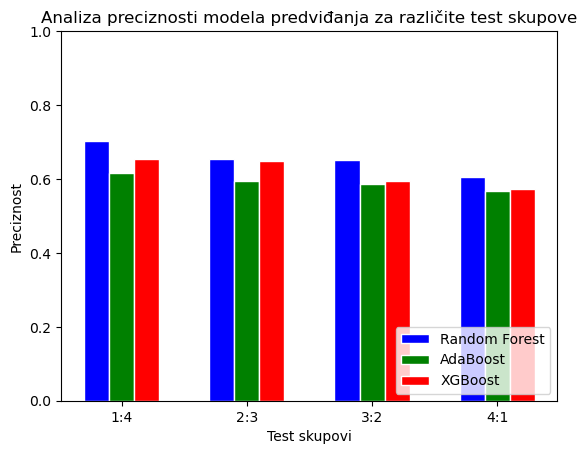

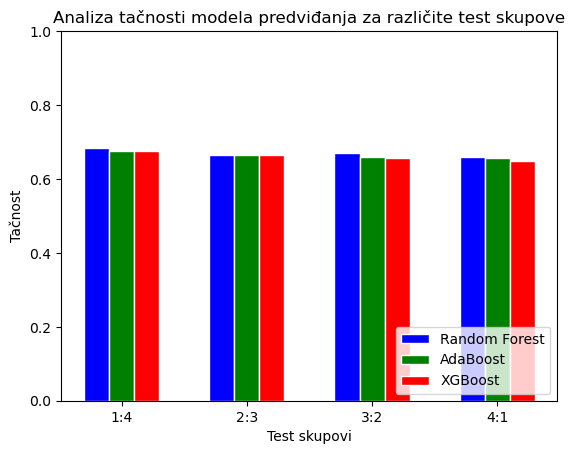

In [139]:
import numpy as np
import matplotlib.pyplot as plt

# Data
predictors = ['Random Forest', 'AdaBoost', 'XGBoost']
testsets = ['1:4', '2:3', '3:2', '4:1']
precisionsrfa = [0.7021276595744681, 0.6549707602339181, 0.6523297491039427, 0.6057906458797327]
precisionsada = [0.6153846153846154, 0.5950704225352113, 0.5868421052631579, 0.5684039087947883]
precisionsxgb = [0.6542056074766355, 0.6497175141242938, 0.594059405940594, 0.5717255717255717]
accuraciesrfa = [0.684640522875817, 0.6642156862745098, 0.6710239651416122, 0.6601307189542484]
accuraciesada = [0.6764705882352942, 0.6650326797385621, 0.6606753812636166, 0.6556372549019608]
accuraciesxgb = [0.6764705882352942, 0.6642156862745098, 0.6557734204793029, 0.6495098039215687]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = np.arange(len(testsets))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plot precision bars
plt.bar(r1, precisionsrfa, color='b', width=bar_width, edgecolor='white', label=predictors[0])
plt.bar(r2, precisionsada, color='g', width=bar_width, edgecolor='white', label=predictors[1])
plt.bar(r3, precisionsxgb, color='r', width=bar_width, edgecolor='white', label=predictors[2])

# Add x-axis labels and title
plt.xlabel('Test skupovi')
plt.ylabel('Preciznost')
plt.title('Analiza preciznosti modela predviđanja za različite test skupove')

# Add y-axis limits
plt.ylim(0, 1)

# Add test set labels to the x-axis
plt.xticks([r + bar_width for r in range(len(testsets))], testsets)

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()


# Plot accuracy bars
plt.bar(r1, accuraciesrfa, color='b', width=bar_width, edgecolor='white', label=predictors[0])
plt.bar(r2, accuraciesada, color='g', width=bar_width, edgecolor='white', label=predictors[1])
plt.bar(r3, accuraciesxgb, color='r', width=bar_width, edgecolor='white', label=predictors[2])

# Add x-axis labels and title
plt.xlabel('Test skupovi')
plt.ylabel('Tačnost')
plt.title('Analiza tačnosti modela predviđanja za različite test skupove')

# Add y-axis limits
plt.ylim(0, 1)

# Add test set labels to the x-axis
plt.xticks([r + bar_width for r in range(len(testsets))], testsets)

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()
